<a href="https://colab.research.google.com/drive/1TPlDVlWCwfXB0lbTJLNnHCoFwIjVgoNH?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NumPy

In [2]:
import numpy as np

`NumPy` is a popular `Python` library for data science focusing on arrays, vectors, and matrices. It is a fundamental library for scientific computing, and it is built on top of the `C` programming language. It provides a high-performance multidimensional array object and tools for working with these arrays. Next example will show how fast `NumPy` is compared to the built-in `Python` lists.

In [65]:
%timeit [i**2 for i in range(10000)]
%timeit np.arange(10000)**2

2.23 ms ± 173 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
13.1 µs ± 662 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## Arrays

### **One-dimensional arrays**

In [66]:
np.array([1, 2, 3, 4, 5])

array([1, 2, 3, 4, 5])

In [67]:
np.array([1, 2, 3, 4, 5], dtype='float32')

array([1., 2., 3., 4., 5.], dtype=float32)

All supported data types in `NumPy` are listed [here](https://numpy.org/doc/stable/user/basics.types.html).

In [68]:
np.arange(1, 6), np.arange(1, 6, dtype='float32')

(array([1, 2, 3, 4, 5]), array([1., 2., 3., 4., 5.], dtype=float32))

In [69]:
np.arange(10, 30, 5)

array([10, 15, 20, 25])

In [70]:
np.linspace(10, 30, 5)

array([10., 15., 20., 25., 30.])

### **Multidimensional arrays**

The `ndarray` is the main class of `NumPy`. It is a multidimensional array of elements of the same type. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of positive integers. In `NumPy` dimensions are called axes. The number of axes is rank.

In [71]:
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])
matrix, matrix.shape, matrix.ndim, matrix.size, matrix.dtype, type(matrix)

(array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]),
 (3, 3),
 2,
 9,
 dtype('int32'),
 numpy.ndarray)

In [72]:
np.arange(1, 10).reshape(3, 3)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [73]:
np.zeros((3, 3)), np.ones((3, 3)), np.eye(3), np.diag(np.arange(1, 4), k=1), np.random.rand(3, 3)

(array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]),
 array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
 array([[0, 1, 0, 0],
        [0, 0, 2, 0],
        [0, 0, 0, 3],
        [0, 0, 0, 0]]),
 array([[0.95529556, 0.99448679, 0.53344729],
        [0.88060141, 0.61286991, 0.56668501],
        [0.09085601, 0.90742092, 0.27131595]]))

### **Indexing and slicing**

<img src="https://github.com/waterhackweek/learning-resources/blob/master/notebooks/img/numpy_indexing.png?raw=1" width="600"/>

In [4]:
arr = np.arange(1, 28).reshape(3, 3, 3)
arr

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]],

       [[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]],

       [[19, 20, 21],
        [22, 23, 24],
        [25, 26, 27]]])

In [75]:
arr[0]

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [76]:
arr[:, 1]

array([[ 4,  5,  6],
       [13, 14, 15],
       [22, 23, 24]])

In [77]:
arr[::2, 1::2]

array([[[ 4,  5,  6]],

       [[22, 23, 24]]])

In [78]:
arr[0, 0, [0, -1]]

array([1, 3])

In [79]:
# Fancy indexing
arr[[0, 1, 2], [0, 1, 2]]

array([[ 1,  2,  3],
       [13, 14, 15],
       [25, 26, 27]])

### **Masking**

In [80]:
mask = arr > 14
mask

array([[[False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]]])

In [81]:
arr[mask]

array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

In [82]:
mask1 = (arr % 6 == 0) | (arr % 4 == 0)
mask2 = np.logical_or(arr % 6 == 0, arr % 4 == 0)
arr[mask1], arr[mask2]

(array([ 4,  6,  8, 12, 16, 18, 20, 24]),
 array([ 4,  6,  8, 12, 16, 18, 20, 24]))

In [83]:
arr[mask1] = -1
arr

array([[[ 1,  2,  3],
        [-1,  5, -1],
        [ 7, -1,  9]],

       [[10, 11, -1],
        [13, 14, 15],
        [-1, 17, -1]],

       [[19, -1, 21],
        [22, 23, -1],
        [25, 26, 27]]])

### **Useful methods**

All the methods of the `ndarray` class can be found [here](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html).

If you forget what a method does, you can use **?** to get the documentation.

In [84]:
arr = np.arange(1, 28).reshape(3, 3, 3)

for func in (arr.max,
             arr.min,
             arr.mean,
             arr.sum,
             arr.std,
             arr.var,
             arr.prod,
             arr.cumsum
             ):
    print(func.__name__, "=", func())

max = 27
min = 1
mean = 14.0
sum = 378
std = 7.788880963698615
var = 60.666666666666664
prod = 1484783616
cumsum = [  1   3   6  10  15  21  28  36  45  55  66  78  91 105 120 136 153 171
 190 210 231 253 276 300 325 351 378]


In [85]:
np.ndarray.flatten?

Docstring:
a.flatten(order='C')

Return a copy of the array collapsed into one dimension.

Parameters
----------
order : {'C', 'F', 'A', 'K'}, optional
    'C' means to flatten in row-major (C-style) order.
    'F' means to flatten in column-major (Fortran-
    style) order. 'A' means to flatten in column-major
    order if `a` is Fortran *contiguous* in memory,
    row-major order otherwise. 'K' means to flatten
    `a` in the order the elements occur in memory.
    The default is 'C'.

Returns
-------
y : ndarray
    A copy of the input array, flattened to one dimension.

See Also
--------
ravel : Return a flattened array.
flat : A 1-D flat iterator over the array.

Examples
--------
>>> a = np.array([[1,2], [3,4]])
>>> a.flatten()
array([1, 2, 3, 4])
>>> a.flatten('F')
array([1, 3, 2, 4])
Type:      method_descriptor


Many methods have an `axis` parameter. If you set `axis=0`, the method will be applied to each column, if you set `axis=1`, the method will be applied to each row and so on.

In [5]:
print(arr)
print(arr.sum())
print(arr.sum(axis=0))
print(arr.sum(axis=1))
print(arr.sum(axis=2))

[[[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]]

 [[10 11 12]
  [13 14 15]
  [16 17 18]]

 [[19 20 21]
  [22 23 24]
  [25 26 27]]]
378
[[30 33 36]
 [39 42 45]
 [48 51 54]]
[[12 15 18]
 [39 42 45]
 [66 69 72]]
[[ 6 15 24]
 [33 42 51]
 [60 69 78]]


Sorting arrays: `np.sort()`, `np.argsort()`, `np.argmax()`, `np.argmin()`

In [87]:
arr = np.random.randn(5)
print(arr)
print(np.sort(arr), np.argsort(arr))

[-0.80927385 -0.39309551 -0.01558542  0.65097588 -0.64386542]
[-0.80927385 -0.64386542 -0.39309551 -0.01558542  0.65097588] [0 4 1 2 3]


In [88]:
a = np.floor(10 * np.random.rand(2, 2))
print('Array a\n', a)

b = np.floor(10 * np.random.rand(2, 2))
print('Array b\n', b)

print('\n---Concatenate a and b vertically---\n')
print(np.vstack((a, b)))
print('\n---Concatenate a and b horizontally---\n')
print(np.hstack((a, b)))

Array a
 [[4. 7.]
 [0. 8.]]
Array b
 [[0. 7.]
 [9. 8.]]

---Concatenate a and b vertically---

[[4. 7.]
 [0. 8.]
 [0. 7.]
 [9. 8.]]

---Concatenate a and b horizontally---

[[4. 7. 0. 7.]
 [0. 8. 9. 8.]]


### **Array broadcasting**
The term broadcasting describes how `NumPy` treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in `C` instead of `Python`. It does this without making needless copies of data and usually leads to efficient algorithm implementations.

<img src="http://scipy-lectures.org/_images/numpy_broadcasting.png" width="600"/>

In [89]:
x = np.ones((3, 4))
y = np.arange(4)
print(x)
print(y)
# Add `x` and `y`. Note that `x` and `y` have different shapes.
print(x.shape, y.shape)
print(x + y)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[0 1 2 3]
(3, 4) (4,)
[[1. 2. 3. 4.]
 [1. 2. 3. 4.]
 [1. 2. 3. 4.]]


In [90]:
x = np.ones((3, 4))
y = np.arange(3)

print(x)
print(y)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[0 1 2]


How to add a vector to each row of a matrix?
The `x+y` provides an `ValueError` because the shapes of the arrays are different.

In [7]:
# Answer
x = np.ones((3, 4))
y = np.arange(3)

y_reshaped = y[:, np.newaxis]
print(y_reshaped)

result = x + y_reshaped

print(result)

[[0]
 [1]
 [2]]
[[1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]]


# Matplotlib

<img src="https://res.cloudinary.com/codecrucks/image/upload/c_scale,w_700,h_327,dpr_2/f_webp,q_auto/v1648958444/chart-types.png?_i=AA" width="800"/>

<img src="http://blog.atkcg.ru/wp-content/uploads/2015/07/1-%D0%B9-%D1%81%D0%BB%D0%B0%D0%B9%D0%B41.jpg" width="800"/>

Here is an image illustrating the anatomy of a `Matplotlib` plot. 

<img src="https://blog.logrocket.com/wp-content/uploads/2021/11/anatomy-figure.png" width="800"/>

`Matplotlib` is a comprehensive library for creating static, animated, and interactive visualizations in `Python`. It is a multi-platform data visualization library built on `NumPy` arrays and designed to work with the broader `SciPy` stack. It was introduced by John Hunter in 2003 and is now maintained by a large team of developers. It is a great library for making publication-quality plots.

## Plotting your first graph

First we need to import the `matplotlib` library.

In [8]:
import matplotlib

Matplotlib can output graphs using various backend graphics libraries, such as Tk, wxPython, etc.  When running python using the command line, the graphs are typically shown in a separate window. In a Jupyter notebook, we can simply output the graphs within the notebook itself by running the `%matplotlib inline` magic command.

In [93]:
%matplotlib inline

Now let's plot our first graph! :)

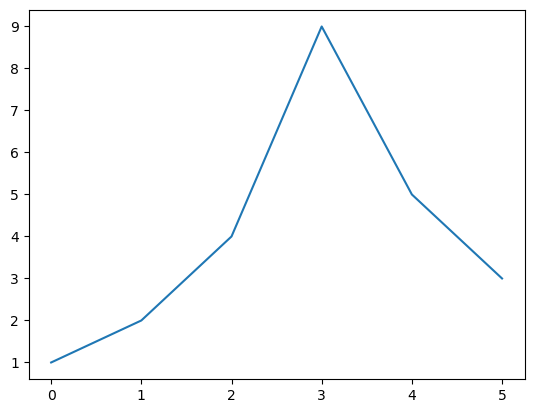

In [11]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 4, 9, 5, 3])
plt.show()

Yep, it's as simple as calling the `plot` function with some data, and then calling the `show` function!

If the `plot` function is given one array of data, it will use it as the coordinates on the vertical axis, and it will just use each data point's index in the array as the horizontal coordinate.
You can also provide two arrays: one for the horizontal axis `x`, and the second for the vertical axis `y`:

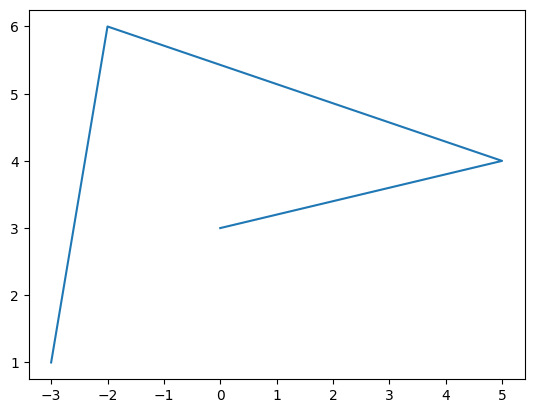

In [95]:
plt.plot([-3, -2, 5, 0], [1, 6, 4, 3])
plt.show()

The axes automatically match the extent of the data.  We would like to give the graph a bit more room, so let's call the `axis` function to change the extent of each axis `[xmin, xmax, ymin, ymax]`.

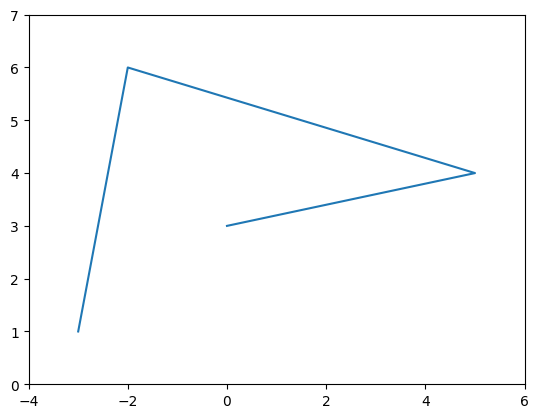

In [96]:
plt.plot([-3, -2, 5, 0], [1, 6, 4, 3])
plt.axis([-4, 6, 0, 7])
plt.show()

Now, let's plot a mathematical function. We use NumPy's `linspace` function to create an array `x` containing 500 floats ranging from -2 to 2, then we create a second array `y` computed as the square of `x`.

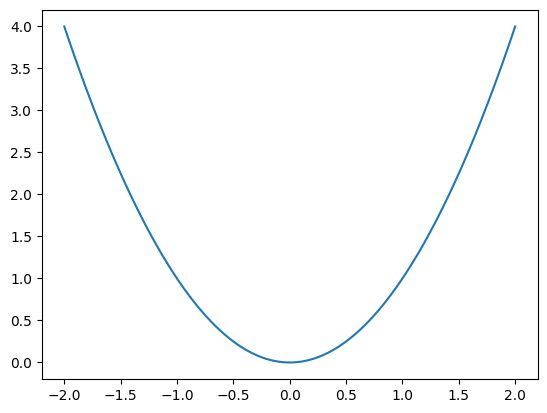

In [97]:
x = np.linspace(-2, 2, 500)
y = x**2

plt.plot(x, y)
plt.show()

That's a bit dry, let's add a title, and x and y labels, and draw a grid.

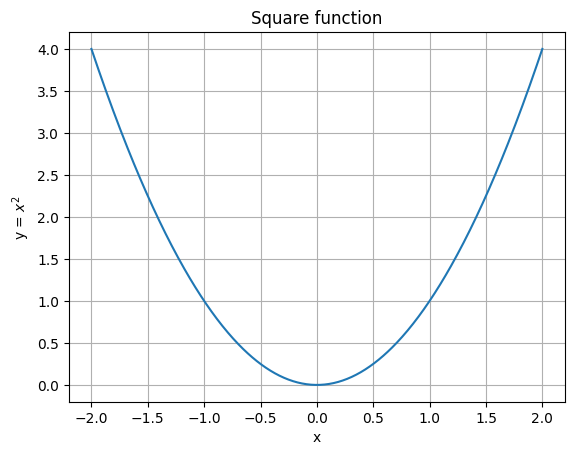

In [98]:
plt.plot(x, y)
plt.title('Square function')
plt.xlabel('x')
plt.ylabel(f'y = $x^2$')
plt.grid(True)
plt.show()

## Line style and color

By default, matplotlib draws a line between consecutive points.

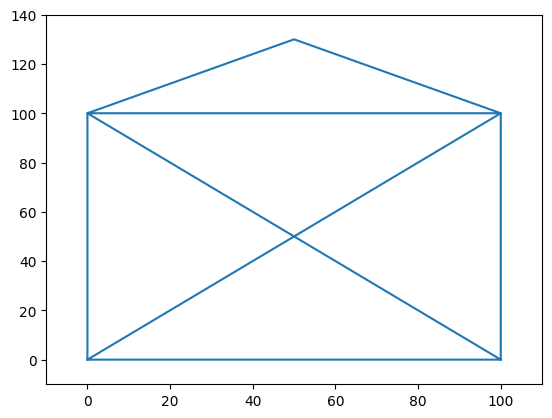

In [99]:
plt.plot([0, 100, 100, 0, 0, 100, 50, 0, 100], [0, 0, 100, 100, 0, 100, 130, 100, 0])
plt.axis([-10, 110, -10, 140])
plt.show()

You can pass a 3rd argument to change the line's style and color.
For example `"g--"` means "green dashed line".

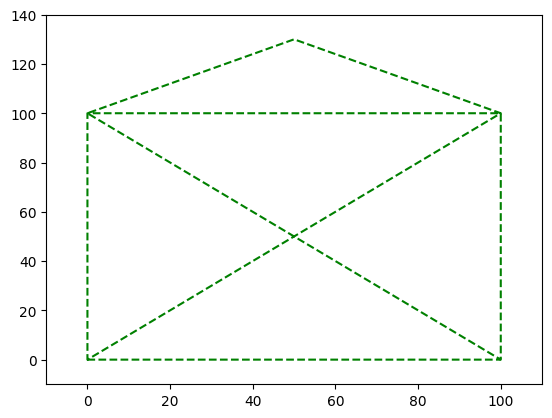

In [100]:
plt.plot([0, 100, 100, 0, 0, 100, 50, 0, 100], [0, 0, 100, 100, 0, 100, 130, 100, 0], "g--")
plt.axis([-10, 110, -10, 140])
plt.show()

You can plot multiple lines on one graph very simply: just pass `x1, y1, [style1], x2, y2, [style2], ...`

For example:

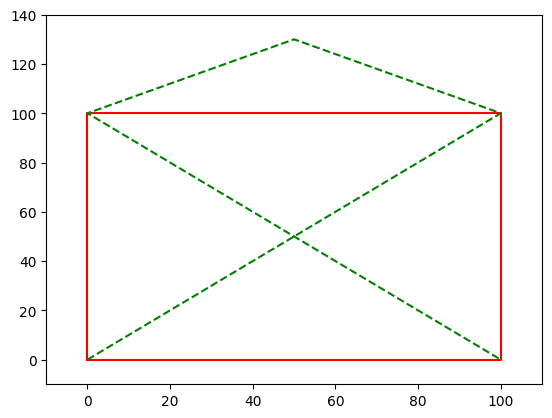

In [101]:
plt.plot([0, 100, 100, 0, 0], [0, 0, 100, 100, 0], "r-", [0, 100, 50, 0, 100], [0, 100, 130, 100, 0], "g--")
plt.axis([-10, 110, -10, 140])
plt.show()

Or simply call `plot` multiple times before calling `show`.

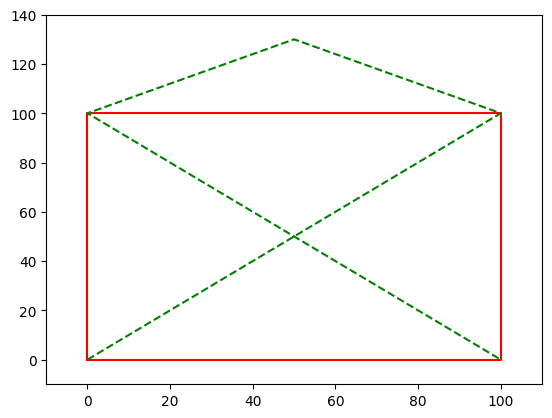

In [102]:
plt.plot([0, 100, 100, 0, 0], [0, 0, 100, 100, 0], "r-")
plt.plot([0, 100, 50, 0, 100], [0, 100, 130, 100, 0], "g--")
plt.axis([-10, 110, -10, 140])
plt.show()

You can also draw simple points instead of lines. Here's an example with green dashes, red dotted line and blue triangles.
Check out [the documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) for the full list of style & color options.

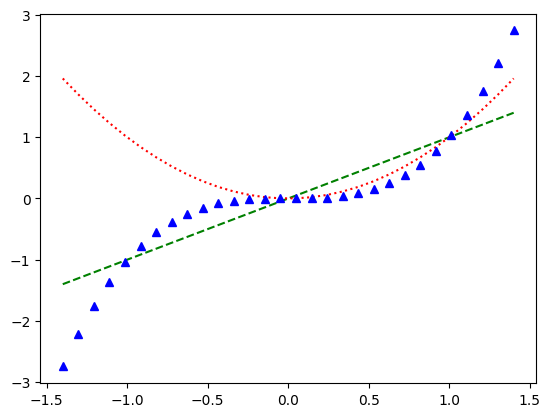

In [103]:
x = np.linspace(-1.4, 1.4, 30)
plt.plot(x, x, 'g--', x, x**2, 'r:', x, x**3, 'b^')
plt.show()

The plot function returns a list of `Line2D` objects (one for each line).  You can set extra attributes on these lines, such as the line width, the dash style or the alpha level.  See the full list of attributes in [the documentation](http://matplotlib.org/users/pyplot_tutorial.html#controlling-line-properties).

In [10]:
x = np.linspace(-1.4, 1.4, 30)
line1, line2, line3 = plt.plot(x, x, 'g--', x, x**2, 'r:', x, x**3, 'b^')
line1.set_linewidth(3.0)
line1.set_dash_capstyle("round")
line3.set_alpha(0.2)
plt.show()

NameError: name 'plt' is not defined

## Subplots
A matplotlib figure may contain multiple subplots. These subplots are organized in a grid. To create a subplot, just call the `subplot` function, and specify the number of rows and columns in the figure, and the index of the subplot you want to draw on (starting from 1, then left to right, and top to bottom). Note that pyplot keeps track of the currently active subplot (which you can get a reference to by calling `plt.gca()`), so when you call the `plot` function, it draws on the *active* subplot.


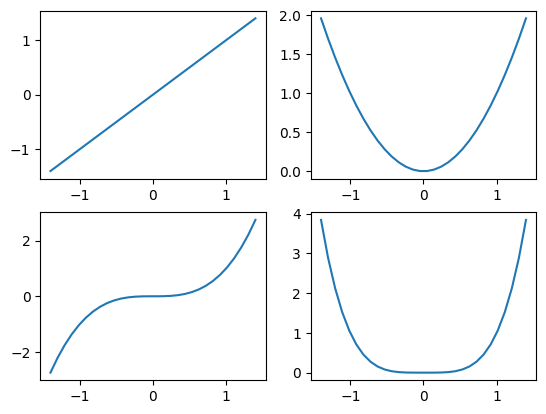

In [105]:
x = np.linspace(-1.4, 1.4, 30)
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot = top left
plt.plot(x, x)
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot = top right
plt.plot(x, x**2)
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot = bottow left
plt.plot(x, x**3)
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot = bottom right
plt.plot(x, x**4)
plt.show()

* Note that `subplot(223)` is a shorthand for `subplot(2, 2, 3)`.

It is easy to create subplots that span across multiple grid cells like so:

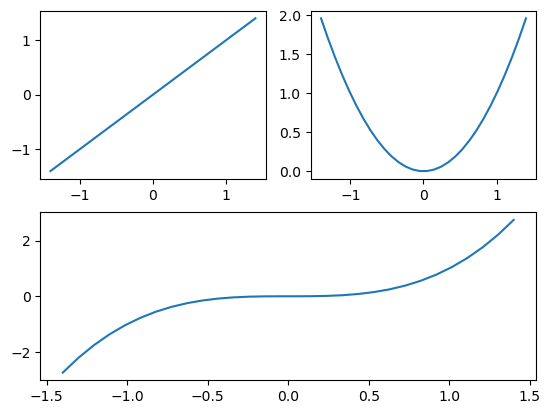

In [13]:
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot = top left
plt.plot(x, x)
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot = top right
plt.plot(x, x**2)
plt.subplot(2, 1, 2)  # 2 rows, *1* column, 2nd subplot = bottom
plt.plot(x, x**3)
plt.show()

If you need more complex subplot positionning, you can use `subplot2grid` instead of `subplot`. You specify the number of rows and columns in the grid, then your subplot's position in that grid (top-left = (0,0)), and optionally how many rows and/or columns it spans.  For example:

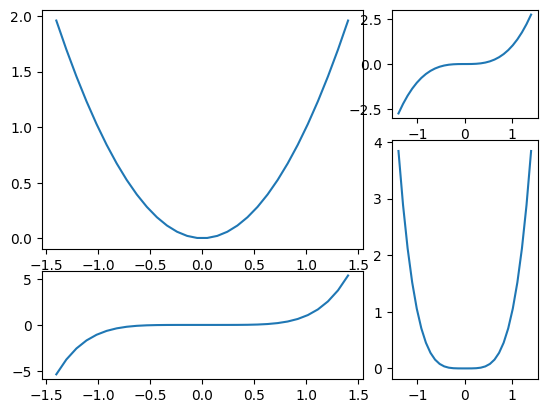

In [107]:
plt.subplot2grid((3,3), (0, 0), rowspan=2, colspan=2)
plt.plot(x, x**2)
plt.subplot2grid((3,3), (0, 2))
plt.plot(x, x**3)
plt.subplot2grid((3,3), (1, 2), rowspan=2)
plt.plot(x, x**4)
plt.subplot2grid((3,3), (2, 0), colspan=2)
plt.plot(x, x**5)
plt.show()

If you need even more flexibility in subplot positioning, check out the [GridSpec documentation](http://matplotlib.org/users/gridspec.html)

When you are writing a program, *explicit is better than implicit*. Explicit code is usually easier to debug and maintain, and if you don't believe me just read the 2nd rule in the **Zen of Python**.

You can write beautifully explicit code. Simply call the `subplots` function and use the figure object and the list of axes objects that are returned. No more magic! For example:

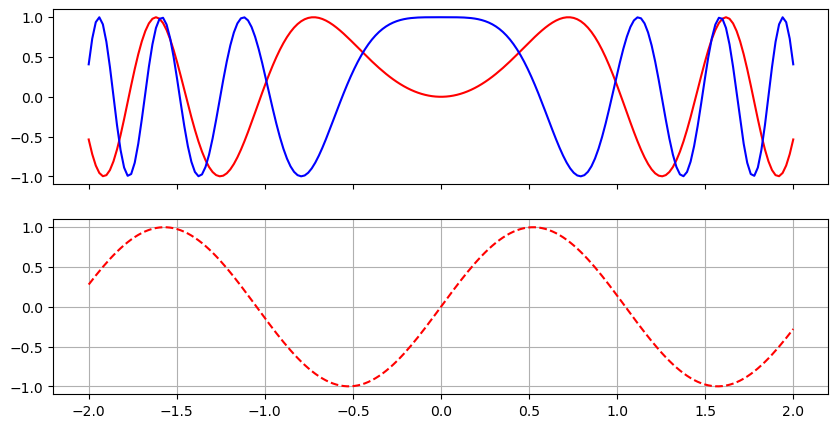

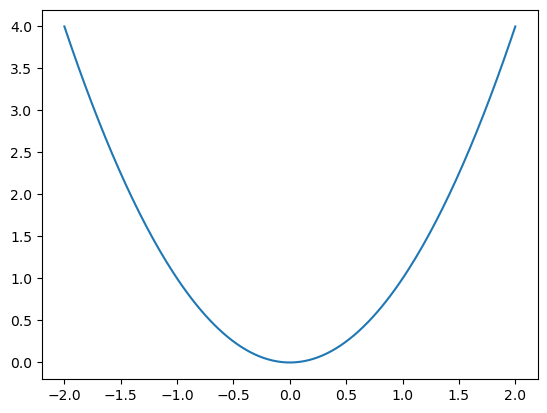

In [15]:
x = np.linspace(-2, 2, 200)

fig1, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)
fig1.set_size_inches(10,5)
line1, line2 = ax_top.plot(x, np.sin(3*x**2), "r-", x, np.cos(5*x**2), "b-")
line3, = ax_bottom.plot(x, np.sin(3*x), "r--")
ax_bottom.grid(True)


fig2, ax = plt.subplots(1, 1)
ax.plot(x, x**2)

plt.show()

## Drawing text
You can call `text` to add text at any location in the graph. Just specify the horizontal and vertical coordinates and the text, and optionally some extra attributes.  Any text in matplotlib may contain TeX equation expressions, see [the documentation](http://matplotlib.org/users/mathtext.html) for more details.

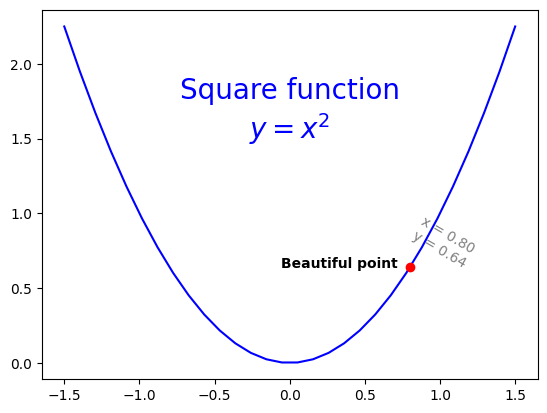

In [109]:
x = np.linspace(-1.5, 1.5, 30)
px = 0.8
py = px**2

plt.plot(x, x**2, "b-", px, py, "ro")

plt.text(0, 1.5, "Square function\n$y = x^2$", fontsize=20, color='blue', horizontalalignment="center")
plt.text(px - 0.08, py, "Beautiful point", ha="right", weight="heavy")
plt.text(px, py, "x = %0.2f\ny = %0.2f"%(px, py), rotation=-30, color='gray')

plt.show()

* Note: `ha` is an alias for `horizontalalignment`

For more text properties, visit [the documentation](http://matplotlib.org/users/text_props.html#text-properties).

It is quite frequent to annotate elements of a graph, such as the beautiful point above. The `annotate` function makes this easy: just indicate the location of the point of interest, and the position of the text, plus optionally some extra attributes for the text and the arrow.

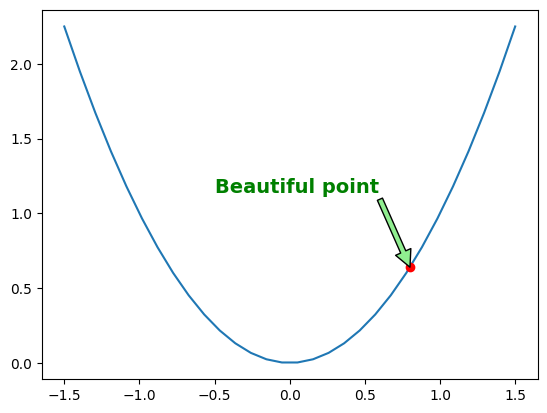

In [110]:
plt.plot(x, x**2, px, py, "ro")
plt.annotate("Beautiful point", xy=(px, py), xytext=(px-1.3,py+0.5),
                           color="green", weight="heavy", fontsize=14,
                           arrowprops={"facecolor": "lightgreen"})
plt.show()

You can also add a bounding box around your text by using the `bbox` attribute:

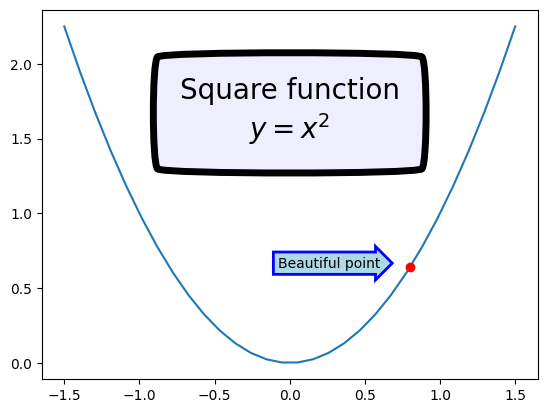

In [111]:
plt.plot(x, x**2, px, py, "ro")

bbox_props = dict(boxstyle="rarrow,pad=0.3", ec="b", lw=2, fc="lightblue")
plt.text(px-0.2, py, "Beautiful point", bbox=bbox_props, ha="right")

bbox_props = dict(boxstyle="round4,pad=1,rounding_size=0.2", ec="black", fc="#EEEEFF", lw=5)
plt.text(0, 1.5, "Square function\n$y = x^2$", fontsize=20, color='black', ha="center", bbox=bbox_props)

plt.show()

Just for fun, if you want an [xkcd](http://xkcd.com)-style plot, just draw within a `with plt.xkcd()` section:

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

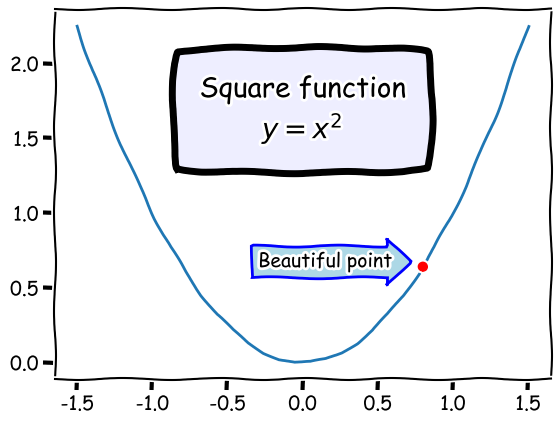

In [112]:
with plt.xkcd():
    plt.plot(x, x**2, px, py, "ro")

    bbox_props = dict(boxstyle="rarrow,pad=0.3", ec="b", lw=2, fc="lightblue")
    plt.text(px-0.2, py, "Beautiful point", bbox=bbox_props, ha="right")

    bbox_props = dict(boxstyle="round4,pad=1,rounding_size=0.2", ec="black", fc="#EEEEFF", lw=5)
    plt.text(0, 1.5, "Square function\n$y = x^2$", fontsize=20, color='black', ha="center", bbox=bbox_props)

    plt.show()

## Legends
The simplest way to add a legend is to set a label on all lines, then just call the `legend` function.

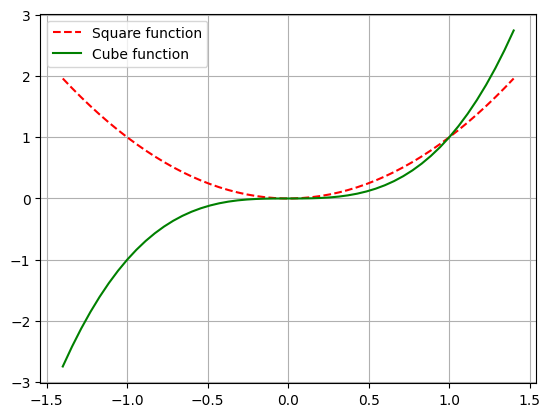

In [113]:
x = np.linspace(-1.4, 1.4, 50)
plt.plot(x, x**2, "r--", label="Square function")
plt.plot(x, x**3, "g-", label="Cube function")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## Ticks and tickers
The axes have little marks called "ticks".  To be precise, "ticks" are the *locations* of the marks (eg. (-1, 0, 1)), "tick lines" are the small lines drawn at those locations, "tick labels" are the labels drawn next to the tick lines, and "tickers" are objects that are capable of deciding where to place ticks. The default tickers typically do a pretty good job at placing ~5 to 8 ticks at a reasonable distance from one another.

But sometimes you need more control (eg. there are too many tick labels on the logit graph above). Fortunately, matplotlib gives you full control over ticks.  You can even activate minor ticks.



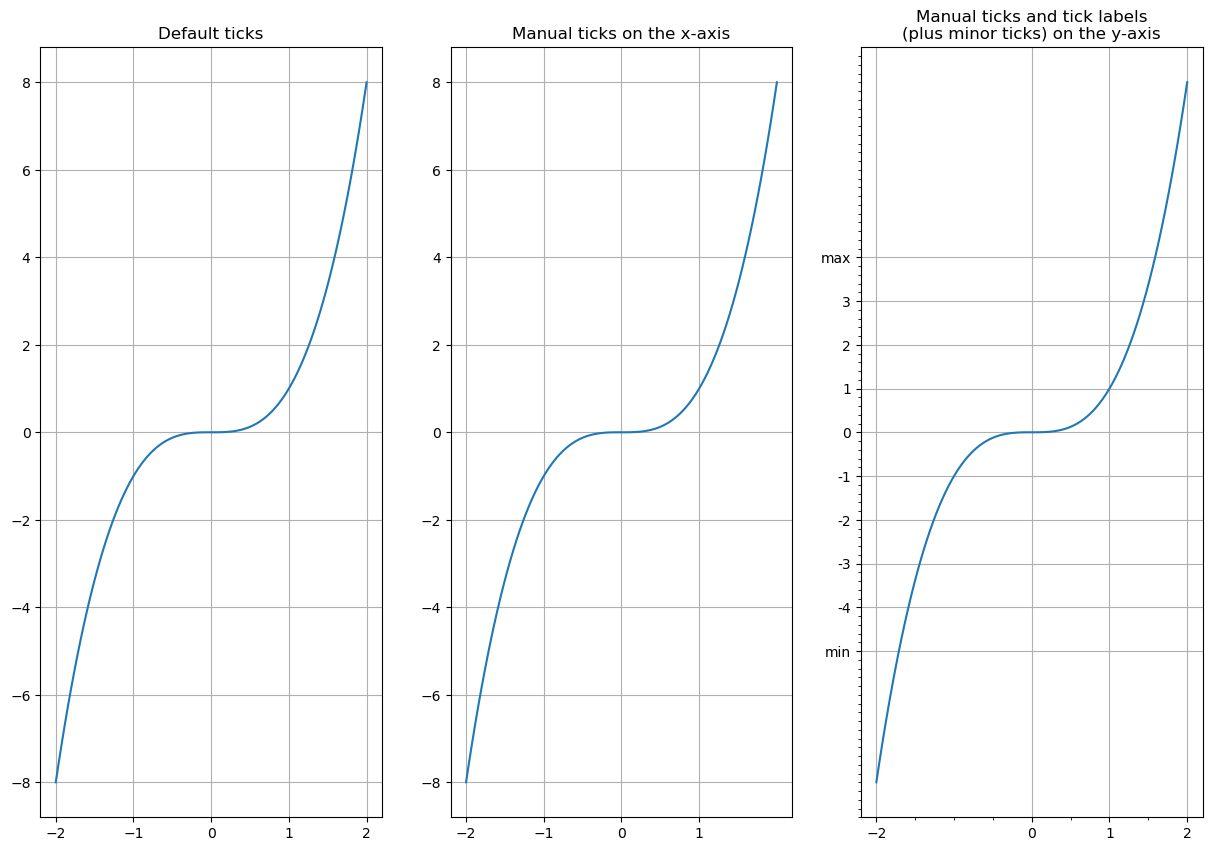

In [30]:
x = np.linspace(-2, 2, 100)

plt.figure(1, figsize=(15,10))
plt.subplot(131)
plt.plot(x, x**3)
plt.grid(True)
plt.title("Default ticks")

ax = plt.subplot(132)
plt.plot(x, x**3)
ax.xaxis.set_ticks(np.arange(-2, 2, 1))
plt.grid(True)
plt.title("Manual ticks on the x-axis")

ax = plt.subplot(133)
plt.plot(x, x**3)
plt.minorticks_on()
ax.tick_params(axis='x', which='minor', bottom='off')
ax.xaxis.set_ticks([-2, 0, 1, 2])
ax.yaxis.set_ticks(np.arange(-5, 5, 1))
ax.yaxis.set_ticklabels(["min", -4, -3, -2, -1, 0, 1, 2, 3, "max"])
plt.title("Manual ticks and tick labels\n(plus minor ticks) on the y-axis")


plt.grid(True)

plt.show()

## 3D projection

Plotting 3D graphs is quite straightforward. You need to import `Axes3D`, which registers the `"3d"` projection. Then create a subplot setting the `projection` to `"3d"`. This returns an `Axes3DSubplot` object, which you can use to call `plot_surface`, giving x, y, and z coordinates, plus optional attributes.

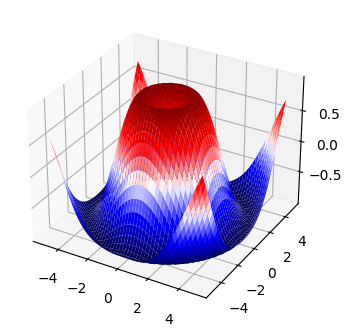

In [115]:
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

figure = plt.figure(1, figsize = (12, 4))
subplot3d = plt.subplot(111, projection='3d')
surface = subplot3d.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='seismic', linewidth=0.1)
plt.show()


Another way to display this same data is *via* a contour plot.

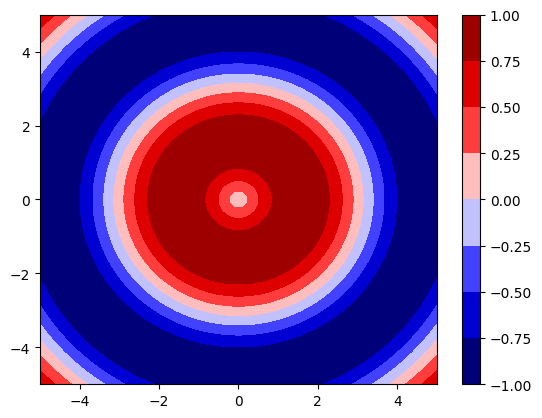

In [116]:
plt.contourf(X, Y, Z, cmap='seismic')
plt.colorbar()
plt.show()

## Scatter plot

To draw a scatter plot, simply provide the x and y coordinates of the points.

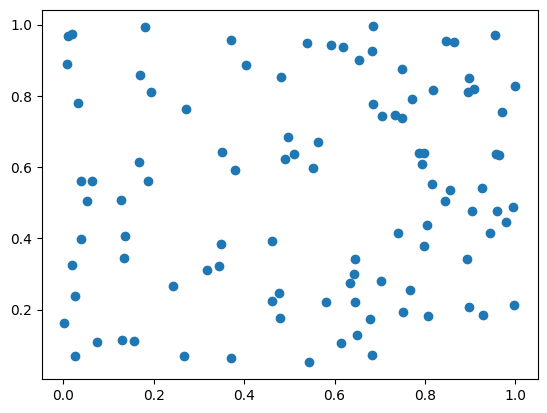

In [117]:
x, y = np.random.rand(2, 100)
plt.scatter(x, y)
plt.show()

You may also optionally provide the scale of each point.

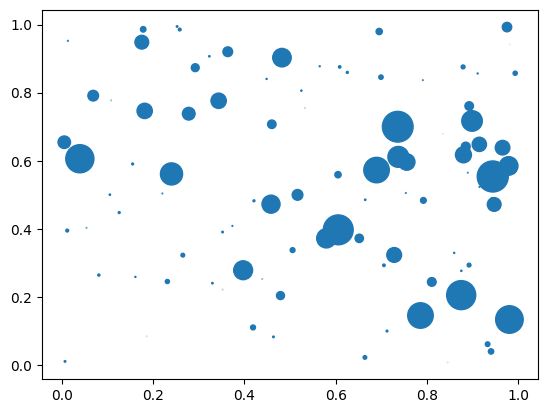

In [118]:
x, y, scale = np.random.rand(3, 100)
scale = 500 * scale ** 5
plt.scatter(x, y, s=scale)
plt.show()

And as usual there are a number of other attributes you can set, such as the fill and edge colors and the alpha level.

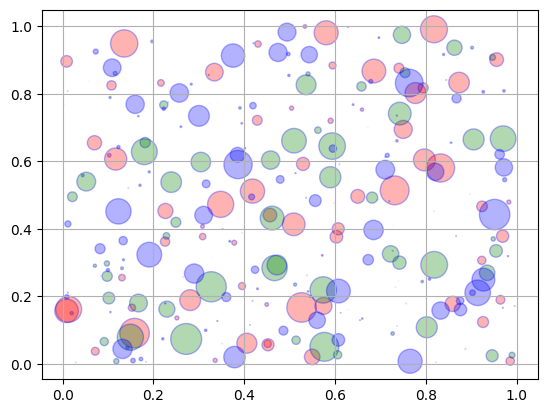

In [119]:
for color in ['red', 'green', 'blue']:
    n = 100
    x, y = np.random.rand(2, n)
    scale = 500.0 * np.random.rand(n) ** 5
    plt.scatter(x, y, s=scale, c=color, alpha=0.3, edgecolors='blue')

plt.grid(True)

plt.show()


## Histograms

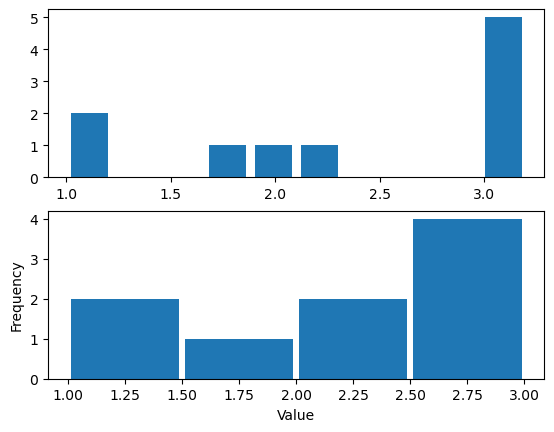

In [41]:
data = [1, 1.1, 1.8, 2, 2.1, 3.2, 3, 3, 3, 3]
plt.subplot(211)
plt.hist(data, bins = 10, rwidth=0.8)

plt.subplot(212)
plt.hist(data, bins = [1, 1.5, 2, 2.5, 3], rwidth=0.95)
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

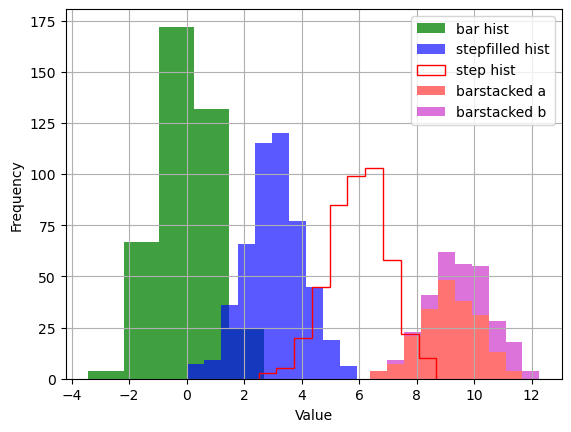

In [62]:
data1 = np.random.randn(400)
data2 = np.random.randn(500) + 3
data3 = np.random.randn(450) + 6
data4a = np.random.randn(200) + 9
data4b = np.random.randn(100) + 10

plt.hist(data1, bins=5, color='g', alpha=0.75, label='bar hist') # default histtype='bar'
plt.hist(data2, color='b', alpha=0.65, histtype='stepfilled', label='stepfilled hist')
plt.hist(data3, color='r', histtype='step', label='step hist')
plt.hist((data4a, data4b), color=('r','m'), alpha=0.55, histtype='barstacked', label=('barstacked a', 'barstacked b'))

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# Example of beauty with matplotlib and NumPy

In subsequent sections we'll provide a basic introduction to the nuts and bolts of the basic scientific python tools; but we'll first motivate it with a brief example that illustrates what you can do in a few lines with these tools.  For this, we will use the simple problem of approximating a definite integral with the trapezoid rule:

$$
\int\limits_{a}^{b} f(x)\, dx \approx \frac{1}{2} \sum_{k=1}^{N} \left( x_{k} - x_{k-1} \right) \left( f(x_{k}) + f(x_{k-1}) \right).
$$

Our task will be to compute this formula for a function such as:

$$
f(x) = (x-3)(x-5)(x-7)+85
$$

integrated between $a=1$ and $b=9$.

First, we define the function and sample it evenly between 0 and 10 at 200 points:

In [65]:
f = lambda x: (x-3)*(x-5)*(x-7) + 85

x = np.linspace(0, 10, 200)
y = f(x)

We select $a$ and $b$, our integration limits, and we take only a few points in that region to illustrate the error behavior of the trapezoid approximation:

In [66]:
a, b = 1, 9
sampling = 10
xint = x[np.logical_and(x>=a, x<=b)][::sampling]
yint = y[np.logical_and(x>=a, x<=b)][::sampling]
# Fix end points of the interval
xint[0], xint[-1] = a, b
yint[0], yint[-1] = f(a), f(b)

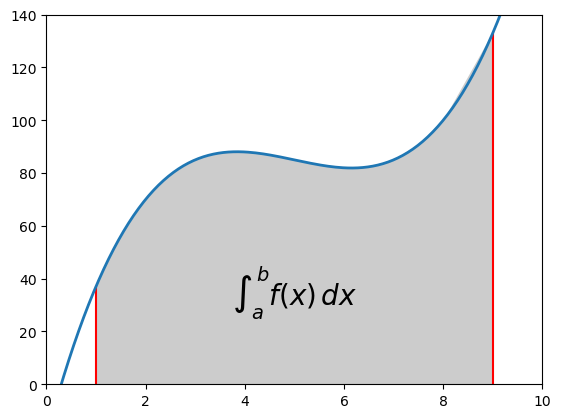

In [68]:
plt.plot([a, a], [0, f(a)], color='red')
plt.plot([b, b], [0, f(b)], color='red')
plt.plot(x, y, lw=2)
plt.axis([a-1, b+1, 0, 140])
plt.fill_between(xint, 0, yint, facecolor='gray', alpha=.4)
plt.text(0.5 * (a + b), 30,r"$\int_a^b f(x)\,dx$", horizontalalignment='center', fontsize=20);

In [125]:
from scipy.integrate import quad, trapz

integral, error = quad(f, a, b)
trap_integral = trapz(yint, xint)
print("The integral is: %g +/- %.1e" % (integral, error))
print("The trapezoid approximation with", len(xint), "points is:", trap_integral)
print("The absolute error is:", abs(integral - trap_integral))

The integral is: 680 +/- 7.5e-12
The trapezoid approximation with 16 points is: 681.1247978745048
The absolute error is: 1.124797874504793


This simple example showed us how, combining the numpy, scipy and matplotlib libraries we can provide an illustration of a standard method in elementary calculus with just a few lines of code.  We will now discuss with more detail the basic usage of these tools.

A note on visual styles: matplotlib has a rich system for controlling the visual style of all plot elements. [This page](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html) is a gallery that illustrates how each style choice affects different plot types, which you can use to select the most appropriate to your needs.

# Homework

## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$. 

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://github.com/V-Kisielius/StatPrak24/blob/main/imgs/tangent_line_-3.0.png?raw=true" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://github.com/V-Kisielius/StatPrak24/blob/main/imgs/tangent_line_-2.0.png?raw=true" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://github.com/V-Kisielius/StatPrak24/blob/main/imgs/tangent_line_1.7.png?raw=true" width="600"/>

In [266]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: 2 * np.sin(x) - np.cos(2 * x)

f_deriv = lambda x: 2 * np.cos(x) + 2 * np.sin(2 * x)

tan_line = lambda x, x0: f_deriv(x0) * (x - x0) + f(x0)

def beauty_derivative_plot(x):
    x_val = np.linspace(-2 * np.pi, 2 * np.pi, 500)
    y_val = f(x_val)
    deriv_val = f_deriv(x_val)
    x0 = np.linspace(x - 1, x + 1, 100)
    tan_val = tan_line(x0, x)
    
    plt.figure(figsize=(9, 5))
    plt.plot(x_val, y_val, "b", label='f(x) = 2sinx - cos2x')
    plt.plot(x_val, deriv_val, "r--", label="f'(x) = 2cosx + 2sin(2x)")
    plt.plot(x0, tan_val, "g", label=f'Tangent at x = {x:.2f}')
    plt.plot(x, f(x), 'ko')
    plt.plot([x, x, 0], [0, f(x), f(x)], 'm--')
    plt.annotate(f"f'({x:.2f}) = {f_deriv(x):.2f}", xy = (x, f(x)), xytext = (x - 1, f(x) - 2), color = "black", arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3,rad=0.1"), fontsize = 9)
    plt.title("Function, Derivative and Tangent Line")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis([-2*np.pi, 2*np.pi, -4, 4])
    plt.axhline(0, color='black', lw=0.4)
    plt.axvline(0, color='black', lw=0.4)
    plt.legend()
    plt.grid(True)
    plt.show()

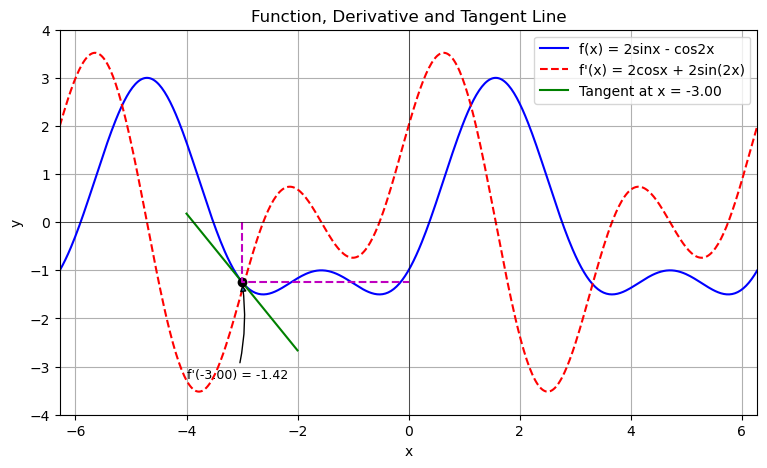

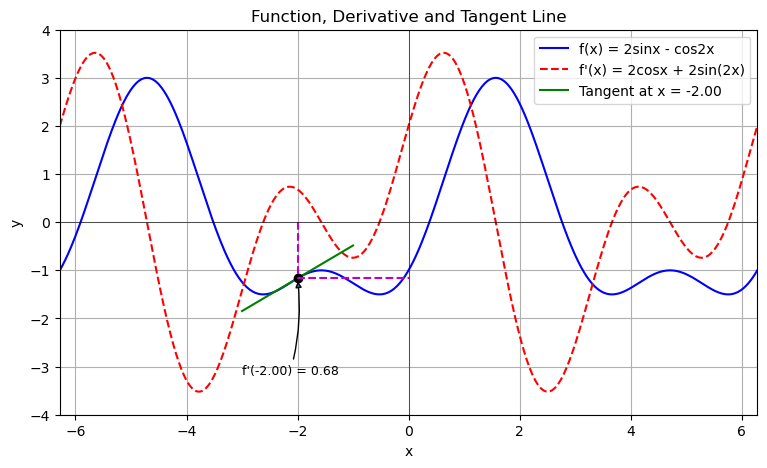

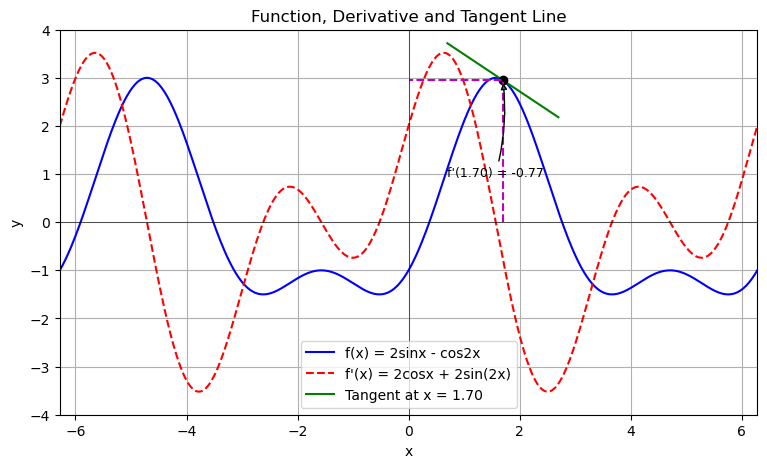

In [267]:
beauty_derivative_plot(-3)
beauty_derivative_plot(-2)
beauty_derivative_plot(1.7)

## Problem 2

The data in [populations.txt](http://www.scipy-lectures.org/_downloads/populations.txt) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Get the data with 
```python
np.loadtxt('http://www.scipy-lectures.org/_downloads/populations.txt')
```
and do the following exercises **without for-loops**.

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

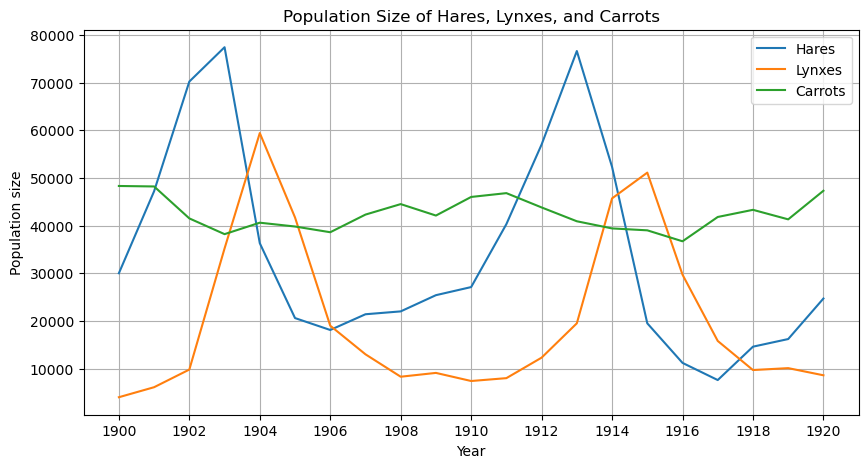

In [158]:
data = np.loadtxt('http://www.scipy-lectures.org/_downloads/populations.txt')
years, hares, lynxes, carrots = data[:, 0], data[:, 1], data[:, 2], data[:, 3]

plt.figure(figsize=(10, 5))
plt.plot(years, hares, label='Hares')
plt.plot(years, lynxes, label='Lynxes')
plt.plot(years, carrots, label='Carrots')
plt.legend()
plt.xlim(1899,1921)
plt.xticks(np.arange(1900, 1921, 2))
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Population size')
plt.title('Population Size of Hares, Lynxes, and Carrots')
plt.show()

- Find which year each species had the largest population. Mark these years in the plot of populations.

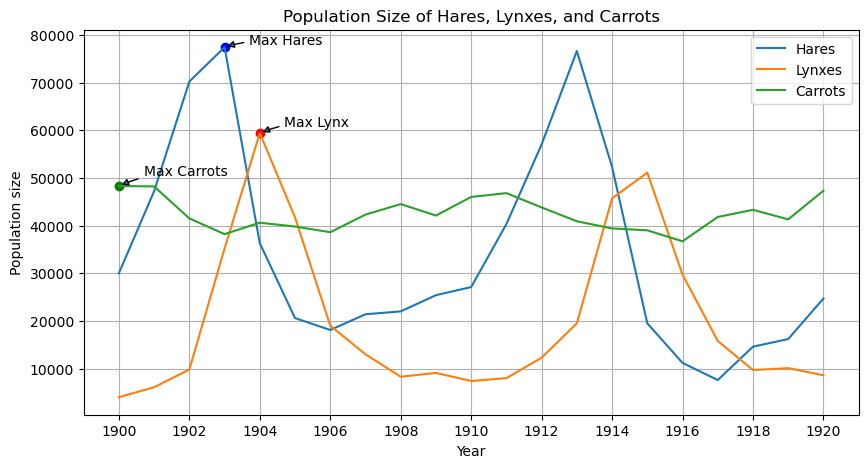

In [176]:
hares_max_year, hares_max = years[np.argmax(hares)], np.max(hares)
lynxes_max_year, lynxes_max = years[np.argmax(lynxes)], np.max(lynxes)
carrots_max_year, carrots_max = years[np.argmax(carrots)], np.max(carrots)
plt.figure(figsize=(10, 5))
plt.plot(hares_max_year, hares_max, 'bo')
plt.plot(lynxes_max_year, lynxes_max, 'ro')
plt.plot(carrots_max_year, carrots_max, 'go')
plt.annotate("Max Hares", xy = (hares_max_year, hares_max), xytext = (hares_max_year + 0.7, hares_max + 500), color = "black", arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3,rad=0.1"))
plt.annotate("Max Lynx", xy = (lynxes_max_year, lynxes_max), xytext = (lynxes_max_year + 0.7, lynxes_max + 1500), color = "black", arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3,rad=0.1"))
plt.annotate("Max Carrots", xy = (carrots_max_year, carrots_max), xytext = (carrots_max_year + 0.7, carrots_max + 2200), color = "black", arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3,rad=0.1"))
plt.plot(years, hares, label='Hares')
plt.plot(years, lynxes, label='Lynxes')
plt.plot(years, carrots, label='Carrots')
plt.legend()
plt.xlim(1899,1921)
plt.xticks(np.arange(1900, 1921, 2))
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Population size')
plt.title('Population Size of Hares, Lynxes, and Carrots')
plt.show()

- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

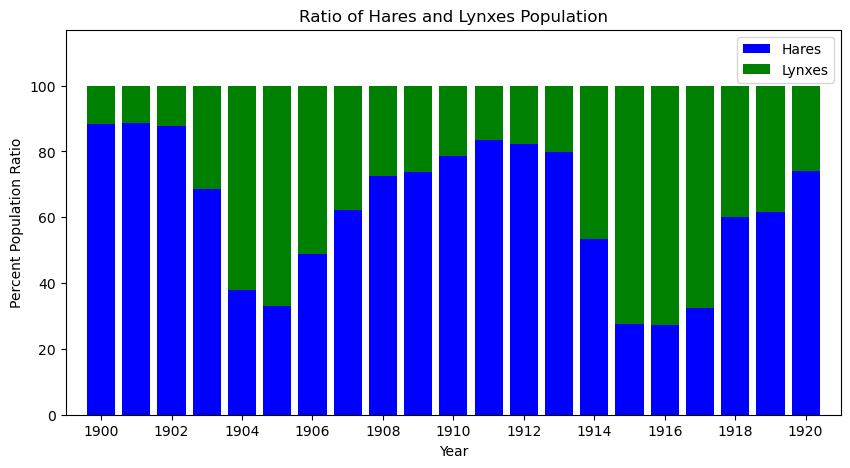

In [198]:
total = hares + lynxes

hare_rat = hares / total * 100
lynx_rat = lynxes / total * 100

plt.figure(figsize=(10,5))
plt.xlim(1899, 1921)
plt.xticks(np.arange(1900, 1921, 2))
plt.ylim(0, 117)
plt.bar(years, hare_rat, label='Hares', color='blue')
plt.bar(years, lynx_rat, bottom=hare_rat, label='Lynxes', color='green')

plt.xlabel('Year')
plt.ylabel('Percent Population Ratio')
plt.title('Ratio of Hares and Lynxes Population')
plt.legend()
plt.show()

- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

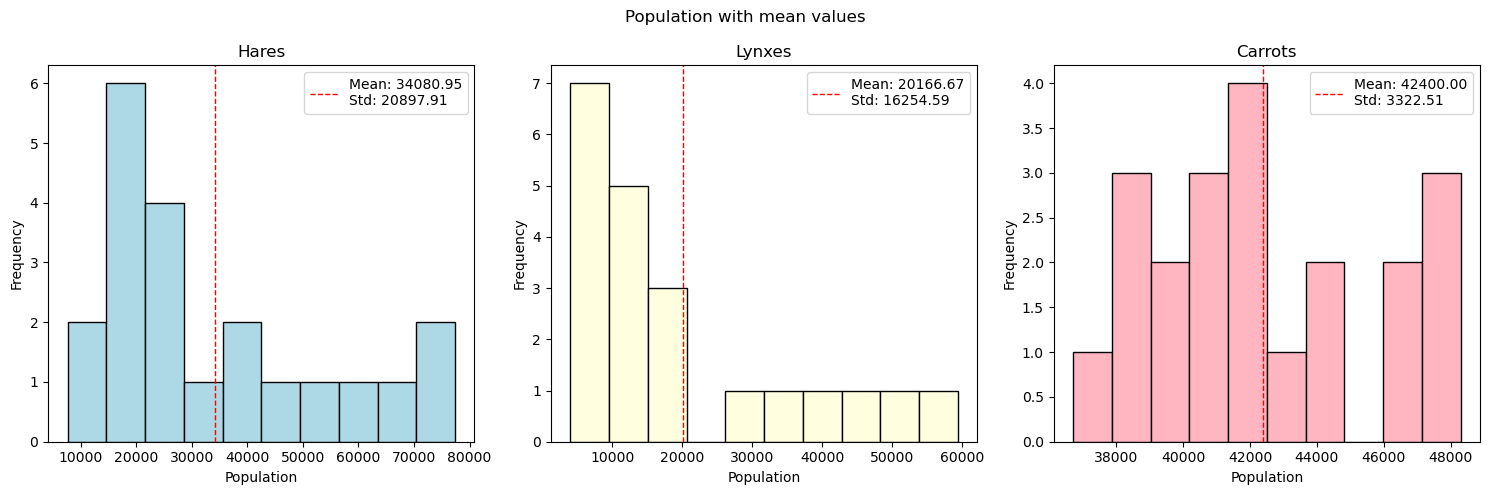

In [209]:
mean_values = [np.mean(hares), np.mean(lynxes), np.mean(carrots)]
std_values = [np.std(hares), np.std(lynxes), np.std(carrots)]

plt.figure(figsize=(15, 5))

plt.suptitle('Population with mean values')
plt.subplot(1, 3, 1)
plt.hist(hares, color='lightblue', edgecolor='black', bins=10)
plt.axvline(mean_values[0], color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_values[0]:.2f}\nStd: {std_values[0]:.2f}')
plt.title('Hares')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(lynxes, color='lightyellow', edgecolor='black', bins=10)
plt.axvline(mean_values[1], color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_values[1]:.2f}\nStd: {std_values[1]:.2f}')
plt.title('Lynxes')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(carrots, color='lightpink', edgecolor='black', bins=10)
plt.axvline(mean_values[2], color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_values[2]:.2f}\nStd: {std_values[2]:.2f}')
plt.title('Carrots')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

['H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H']


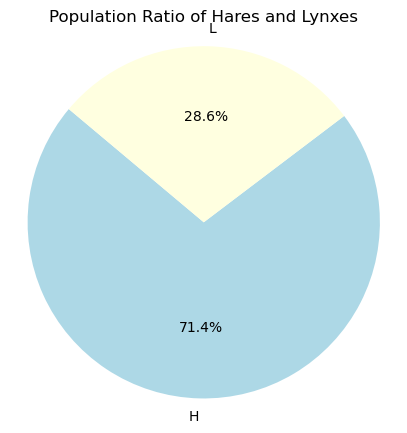

In [215]:
dom_spec = ['H' if h > l else 'L' for h, l in zip(hares, lynxes)]

print(dom_spec)

spec_counts = {'H': dom_spec.count('H'), 'L': dom_spec.count('L')}

plt.figure(figsize=(5, 5))
plt.pie(spec_counts.values(), labels=spec_counts.keys(), autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightyellow'])
plt.axis('equal')
plt.title('Population Ratio of Hares and Lynxes')
plt.show()

- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

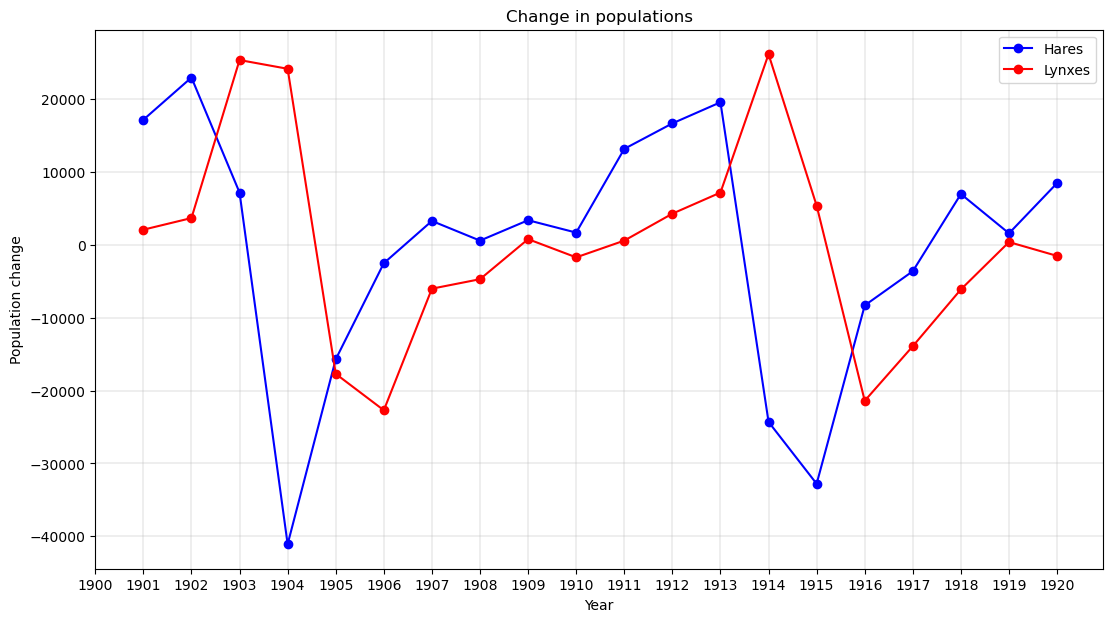

Correlation coefficient: -0.1780136594118296


In [240]:
hares_diff = np.diff(hares)
lynx_diff = np.diff(lynxes)
plt.figure(figsize=(13, 7))
plt.plot(years[1:], hares_diff, 'o-b', label='Hares')
plt.plot(years[1:], lynx_diff, 'o-r', label='Lynxes')
plt.xticks(years)
plt.xlabel('Year')
plt.ylabel('Population change')
plt.legend()
plt.grid(lw = 0.3)
plt.title('Change in populations')
plt.show()
correlation = np.corrcoef(hares_diff, lynx_diff)[0, 1]

print(f'Correlation coefficient: {correlation}')

- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

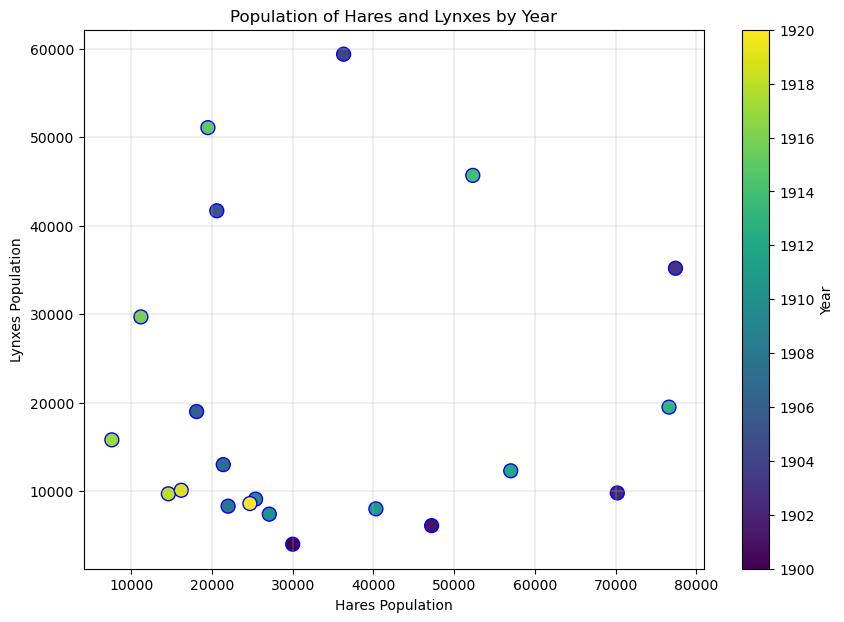

In [253]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(hares, lynxes, c=years, cmap='viridis', edgecolor='blue', s=100)
plt.colorbar(scatter, ticks=np.arange(min(years), max(years)+1, 2), format='%d', label='Year')
plt.xlabel('Hares Population')
plt.ylabel('Lynxes Population')
plt.title('Population of Hares and Lynxes by Year')
plt.grid(True)
plt.grid(lw=0.3)
plt.show()

- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [258]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(data[:, 0].reshape(-1, 1), data[:, 1])
population_predicted = model.predict([[1920]])
popultaion_true = hares[-1]
error_ratio = abs(population_predicted - popultaion_true) / popultaion_true
print(f"Predicted value: {population_predicted[0]}")
print(f"True value: {popultaion_true}")
print(f"Ratio of the error: {error_ratio[0]}")

Predicted value: 20649.78354978375
True value: 24700.0
Ratio of the error: 0.16397637450268213
